I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [1]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_file = '/u/ki/swmclau2/des/PearceRedMagicWpCosmo.hdf5'

em_method = 'gp'
split_method = 'random'

In [4]:
a = 1.0
z = 1.0/a - 1.0

In [5]:
fixed_params = {'z':z}#, 'r':0.18477483}

In [6]:
n_leaves, n_overlap = 100, 2
emu = ExtraCrispy(training_file, n_leaves, n_overlap, split_method, method = em_method, fixed_params=fixed_params,
                 custom_mean_function = None, downsample_factor = 0.2)

/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:253: UserWarning: WARNING: NaN detected. Skipped 3941 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [17]:
emu.x.shape

(100, 5781, 14)

In [7]:
emu._ordered_params

OrderedDict([('ombh2', (0.02066455, 0.02371239)),
             ('omch2', (0.1012181, 0.13177679999999997)),
             ('w0', (-1.399921, -0.5658486)),
             ('ns', (0.9278462, 0.9974495999999999)),
             ('ln10As', (3.0009, 3.179424)),
             ('H0', (61.69472, 74.76751999999999)),
             ('Neff', (2.62125, 4.27875)),
             ('logM1', (13.0, 15.0)),
             ('logMmin', (11.5, 13.5)),
             ('f_c', (0.01, 0.5)),
             ('logM0', (12.0, 16.0)),
             ('sigma_logM', (0.05, 0.6)),
             ('alpha', (0.8, 1.2)),
             ('r', (-1.1000000189853054, 1.6000000000507297))])

In [8]:
params = {'ombh2': 0.021,
             'omch2': 0.11,
             'w0': -1.01,
             'ns': 0.9578462,
             'ln10As': 3.08,
             'H0': 68.1,
             'Neff': 3.04,
             'logM1': 14.0,
             'logMmin': 11.9,
             'f_c': 0.2,
             'logM0': 13.2,
             'sigma_logM': 0.12,
             'alpha':1.1}

In [9]:
wp = emu.emulate_wrt_r(params, emu.scale_bin_centers)[0]

In [10]:
emu._x_mean, emu._x_std

(array([ 2.22473511e-02,  1.18123767e-01, -1.00485332e+00,  9.62216228e-01,
         3.08983029e+00,  6.83608759e+01,  3.44543083e+00,  1.39989072e+01,
         1.24850398e+01,  2.54063988e-01,  1.39632580e+01,  3.26371493e-01,
         1.00216109e+00,  2.56444085e-01]),
 array([7.38594488e-04, 7.03286495e-03, 2.07402642e-01, 1.64803757e-02,
        4.99982658e-02, 3.85720859e+00, 4.90458762e-01, 5.77559450e-01,
        5.82243978e-01, 1.42270736e-01, 1.14254532e+00, 1.59030427e-01,
        1.16111216e-01, 7.78219120e-01]))

In [11]:
emu.x.shape

(100, 5781, 14)

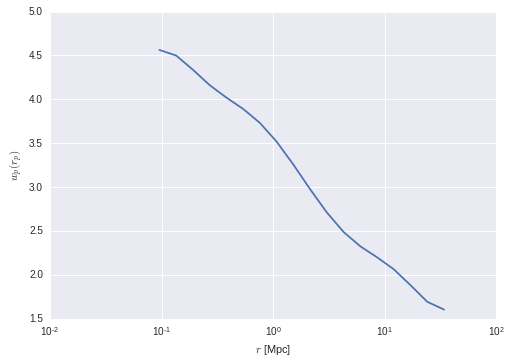

In [12]:
plt.plot(emu.scale_bin_centers, wp)
plt.xscale('log')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$w_p(r_p)$')
plt.show()

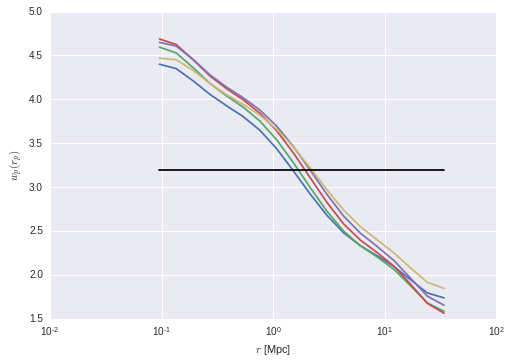

In [16]:
param_name = 'logMmin'
param_bounds = emu.get_param_bounds(param_name)
pvals = np.linspace(param_bounds[0],param_bounds[1], 5)

for val in pvals:
    params[param_name] = val
    #print params
    wp = emu.emulate_wrt_r(params, emu.scale_bin_centers)[0]
    #print(wp)
    plt.plot(emu.scale_bin_centers, wp, label = '%s = %.2f'%(param_name, val))
    
plt.plot(emu.scale_bin_centers, np.mean(emu._y_mean)*np.ones_like(emu.scale_bin_centers), color = 'k')

    
plt.xscale('log')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$w_p(r_p)$')
plt.show()

In [14]:
432/18

24

In [15]:
idx = 25
binlen = len(emu.scale_bin_centers)

params = {pname: p for pname, p in zip(emu.get_param_names(), emu._x_std[:-1]*emu.x[idx*binlen, :-1] + emu._x_mean[:-1])}

IndexError: index 450 is out of bounds for axis 0 with size 100

In [ ]:
wp = emu.emulate_wrt_r(params,emu.scale_bin_centers)[0]

In [ ]:
plt.plot(emu.scale_bin_centers, wp, label = 'Emu')
plt.plot(emu.scale_bin_centers, emu._y_std*emu.y[idx*binlen:(idx+1)*binlen]+emu._y_mean, label = 'Truth')
#plt.plot(emu.x[idx*binlen:(idx+1)*binlen, -1], lm_pred)
plt.xscale('log')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$w_p(r_p)$')
plt.legend(loc = 'best')
plt.show()

In [ ]:
emu.y.shape

In [ ]:
emu._y_mean

In [ ]:
params['f_c'] = 0.1

In [ ]:
params['r'] = emu.scale_bin_centers

In [ ]:
t_list = [params[pname] for pname in emu._ordered_params if pname in params]
t_grid = np.meshgrid(*t_list)
t = np.stack(t_grid).T
t = t.reshape((-1, emu.emulator_ndim))

In [ ]:
t-=emu._x_mean
t/=(emu._x_std + 1e-5)

In [ ]:
for i in xrange(emu.y.shape[0]):
    print gp.predict(emu.y[i], t, return_cov= False)

In [ ]:
emu.mean_function(t)

In [ ]:
emu._mean_func.named_steps['linearregression'].coef_